In [2]:
from Utils.A2C_inspection import *
from Utils.inspection_plots import *
from Utils import utils
import AC_modules.Networks as net
from AC_modules.BatchedA2C import SpatialA2C

import torch
import numpy as np
import matplotlib.pyplot as plt

In [23]:
n =50
step_idx =  0 + n*2400
step_idx

120000

In [24]:
load_dir = "Results/Inspection/"
PID = 'FYMW'#"AVPT"
step_idx = step_idx
insp_dict = np.load(load_dir+PID+"_"+str(step_idx)+".npy", allow_pickle=True).item()

In [25]:
insp_dict.keys()

dict_keys(['state_traj', 'rewards', 'action_distr', 'action_sel', 'values', 'trg_values', 'critic_losses', 'advantages', 'actor_losses'])

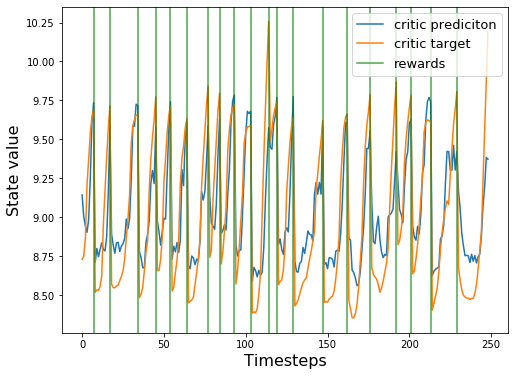

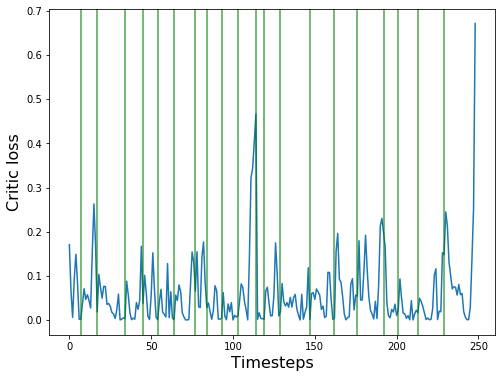

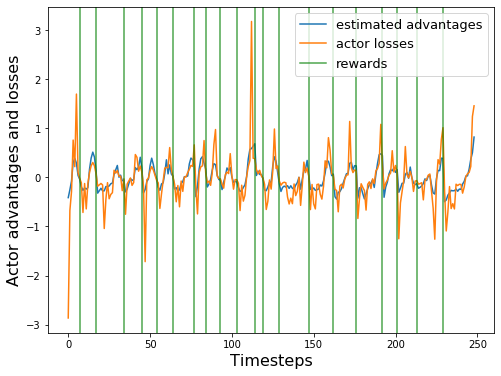

In [26]:
plot_update_curves(insp_dict)

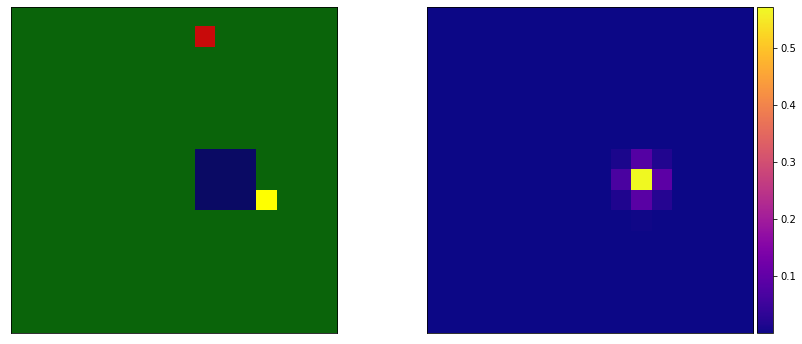

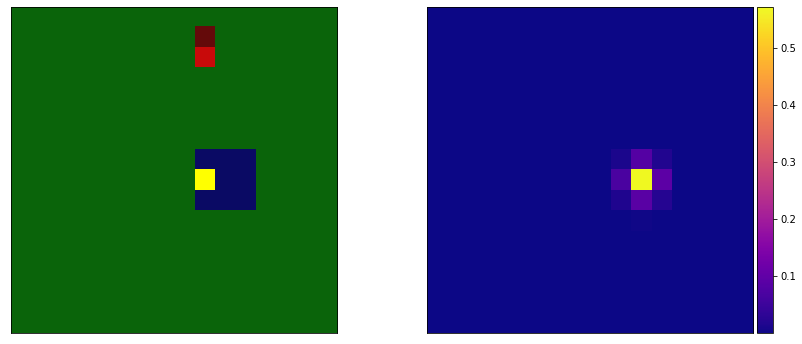

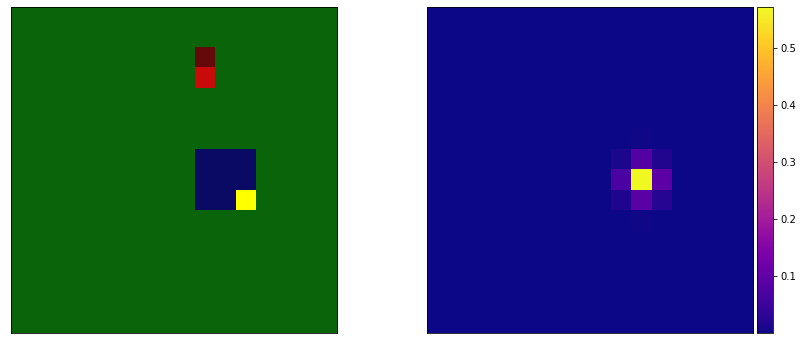

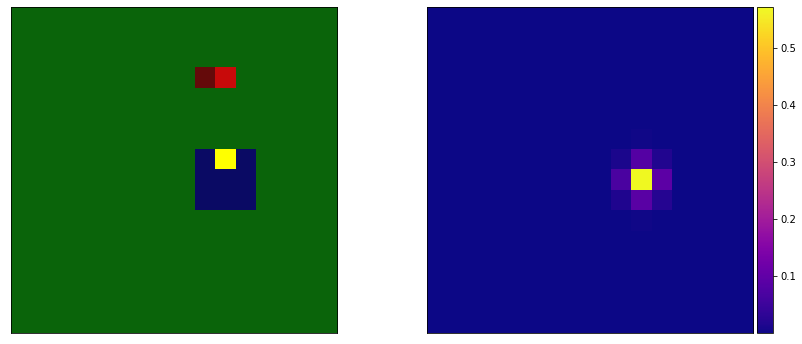

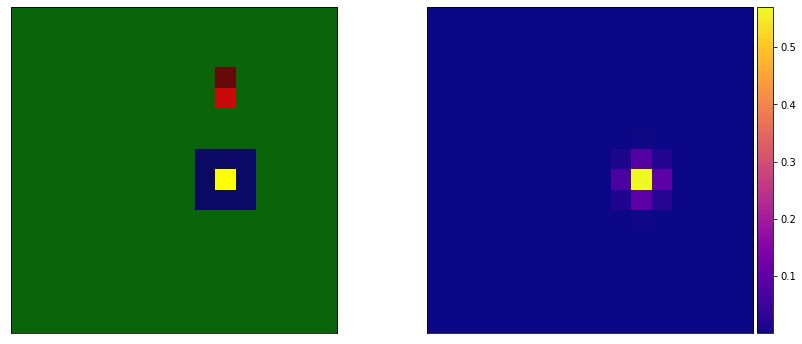

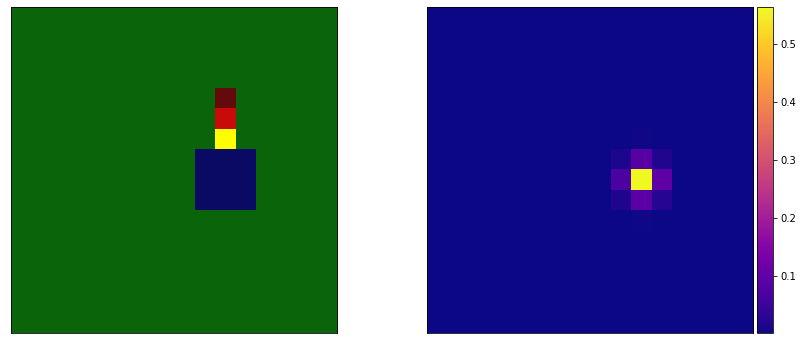

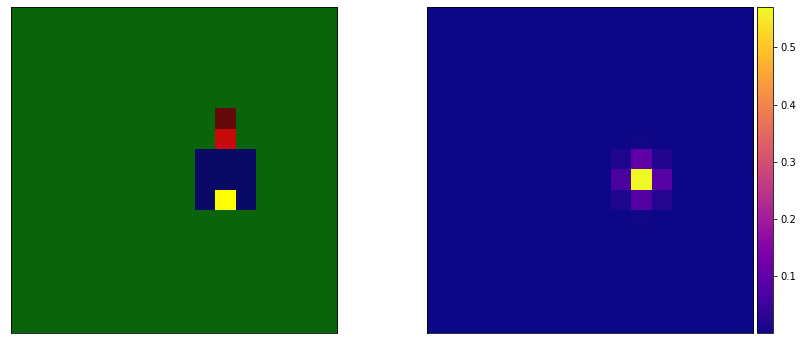

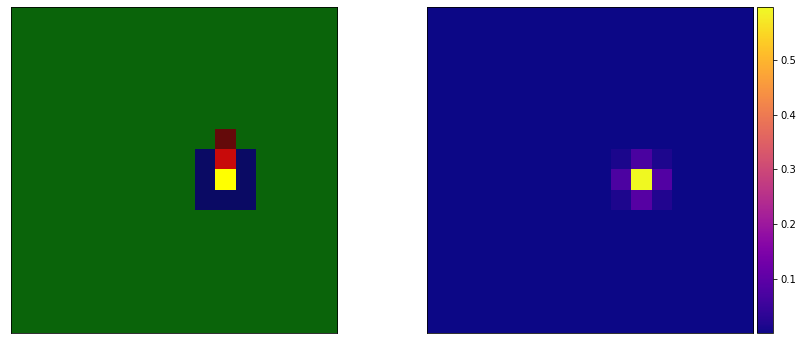

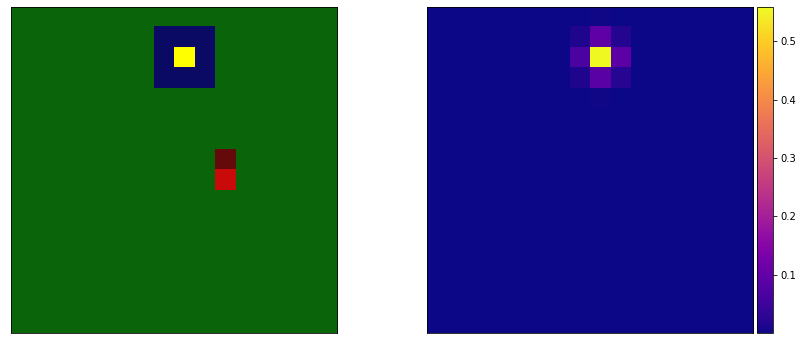

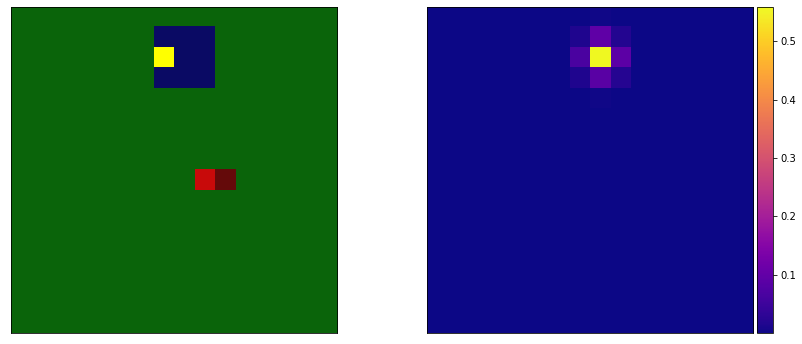

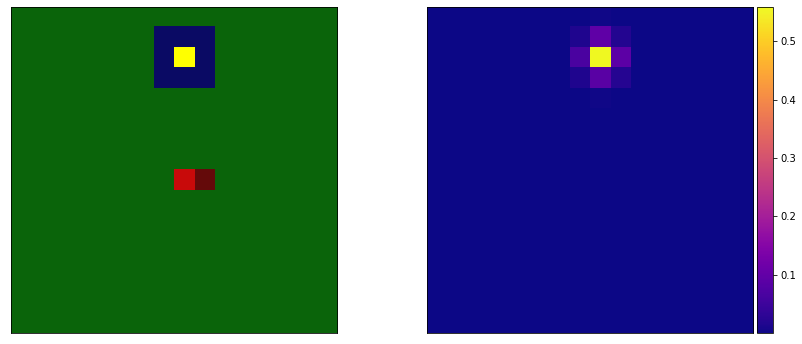

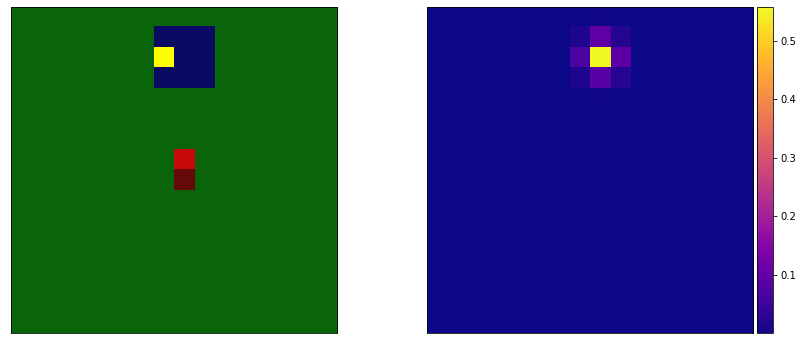

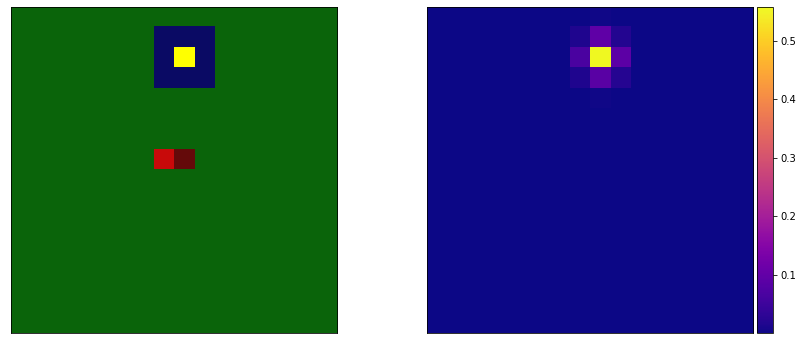

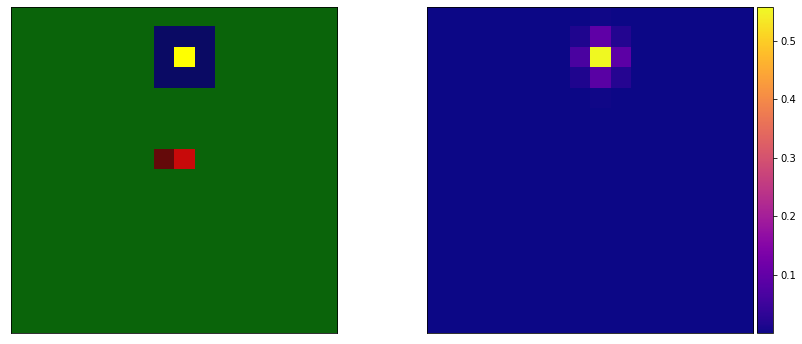

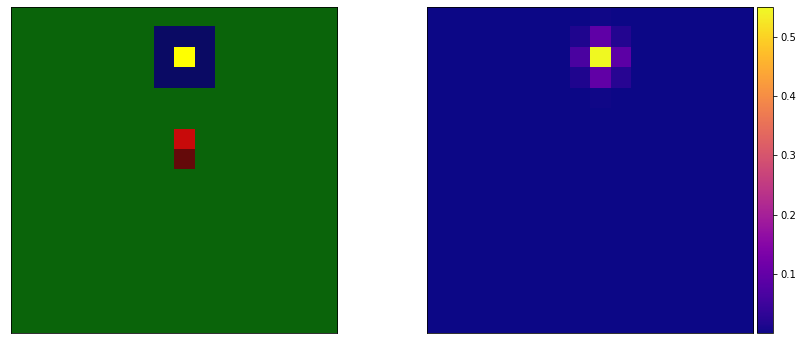

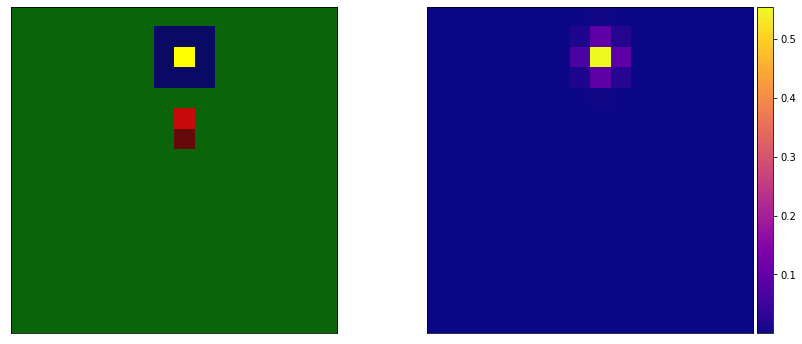

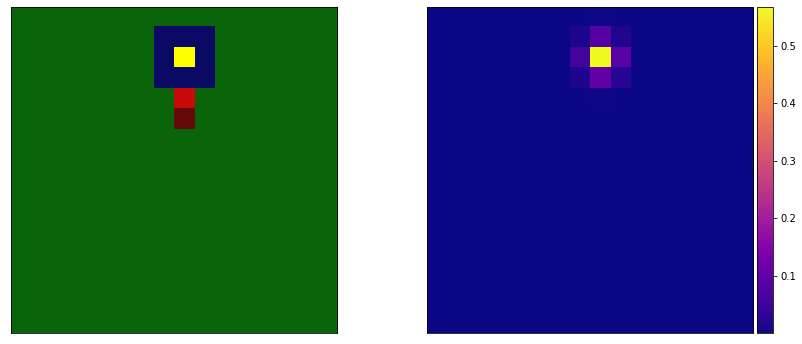

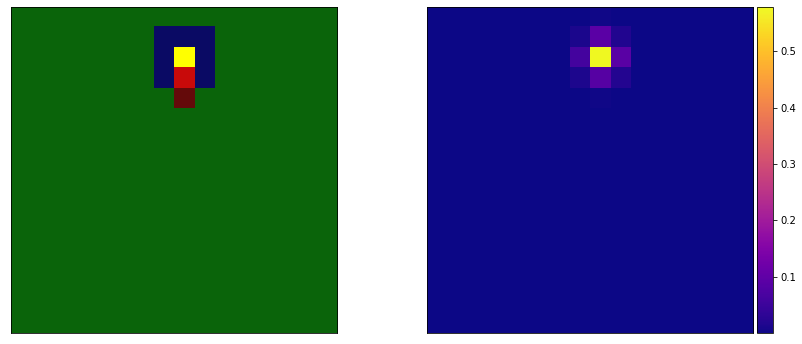

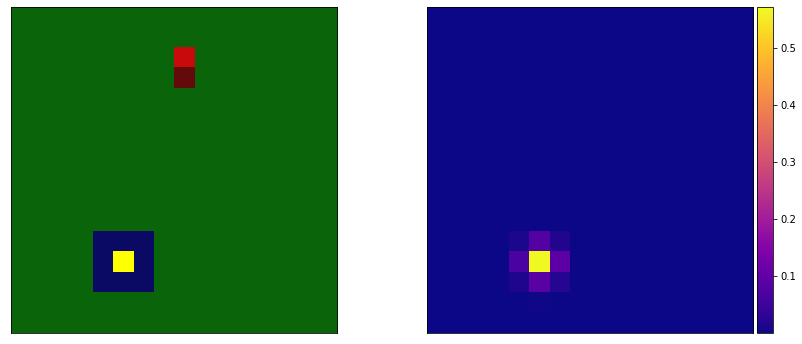

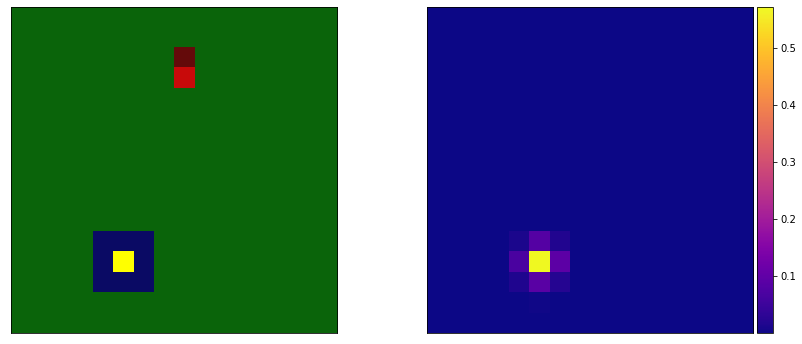

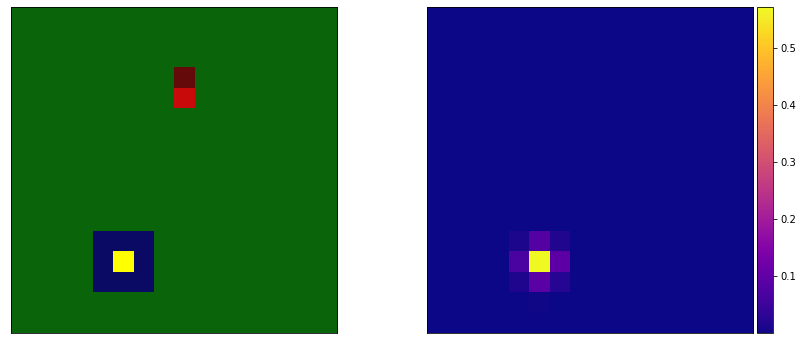

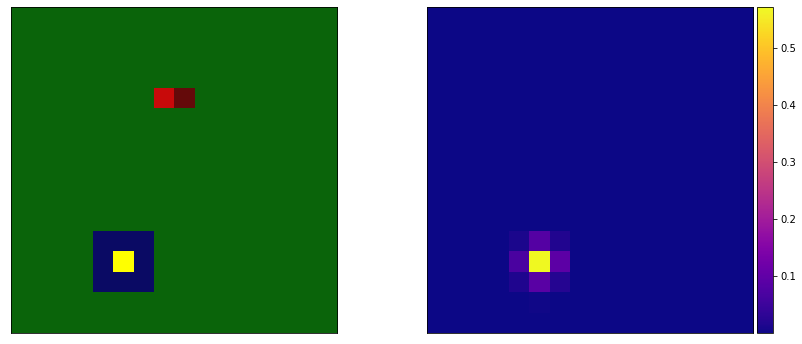

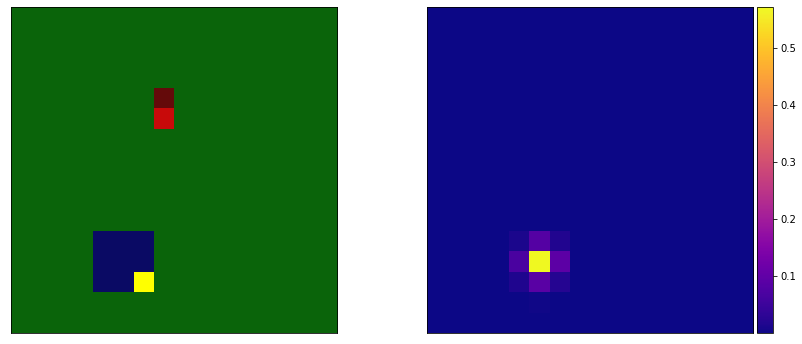

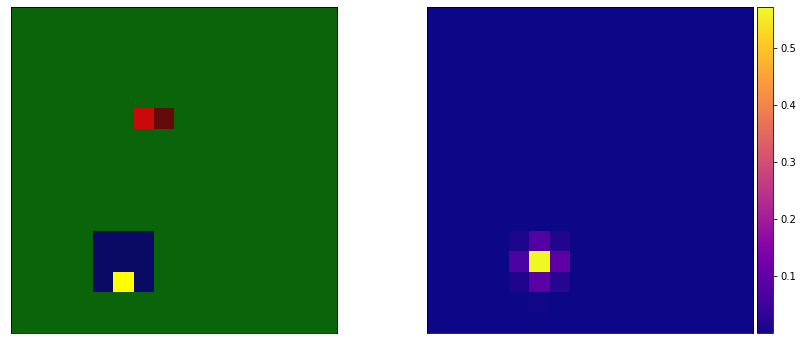

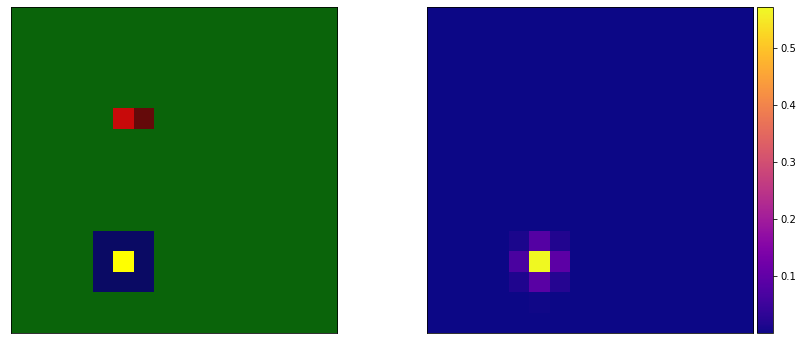

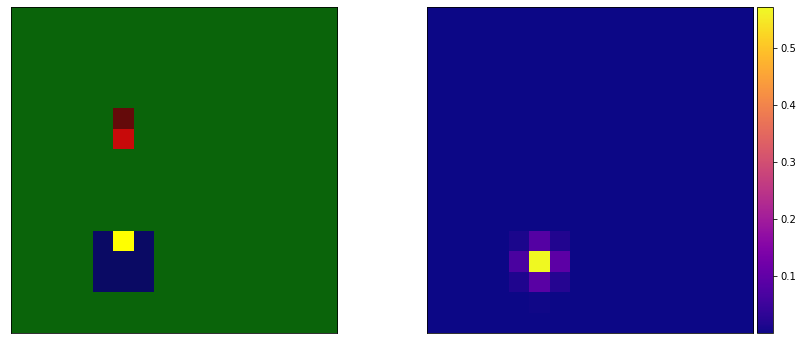

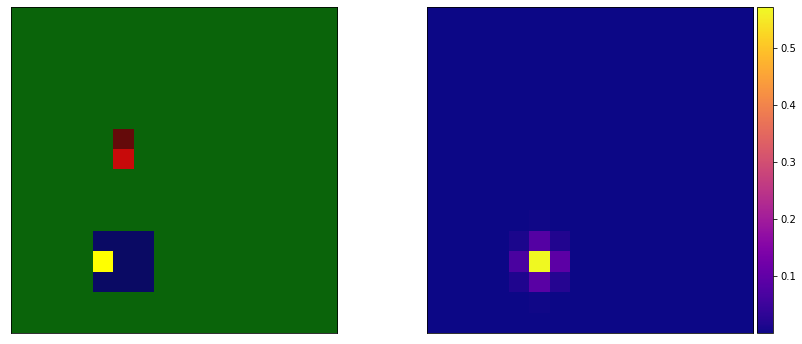

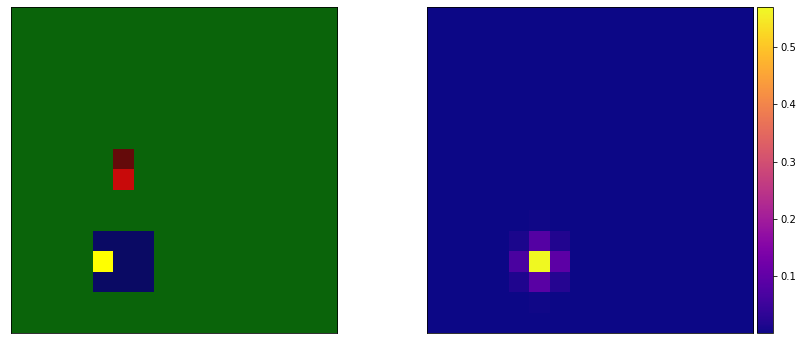

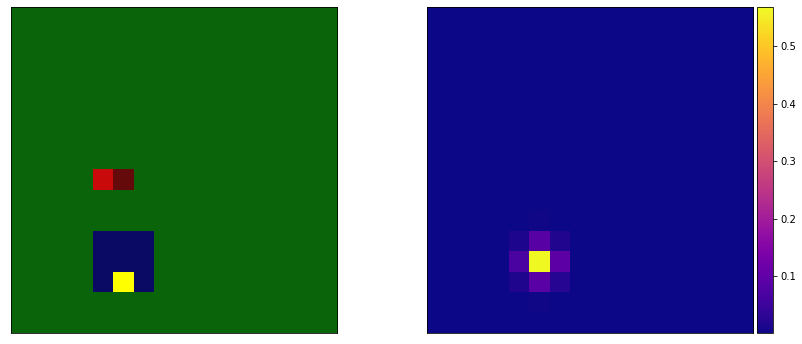

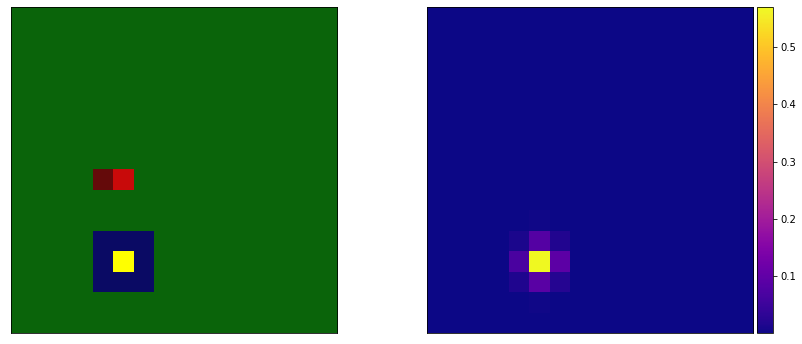

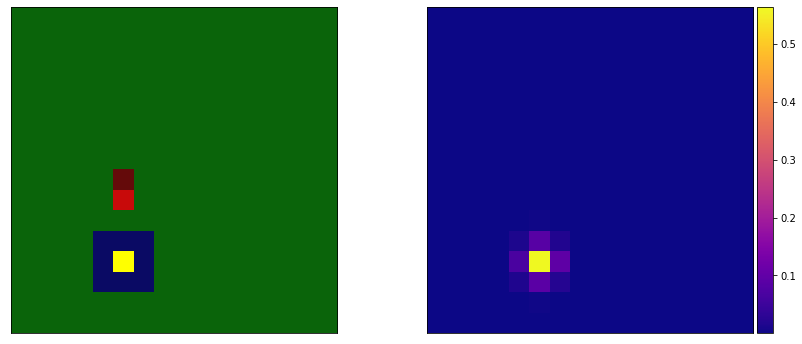

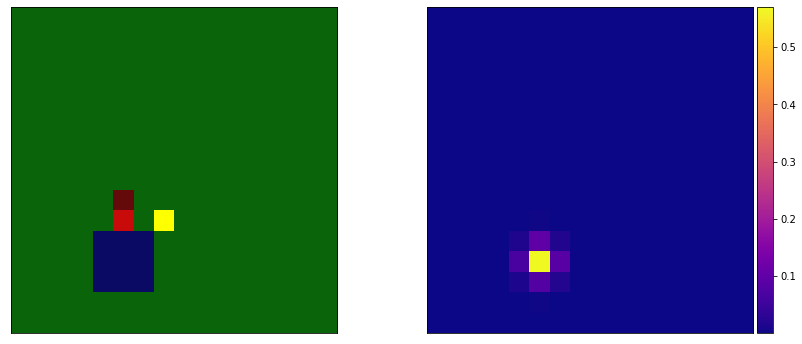

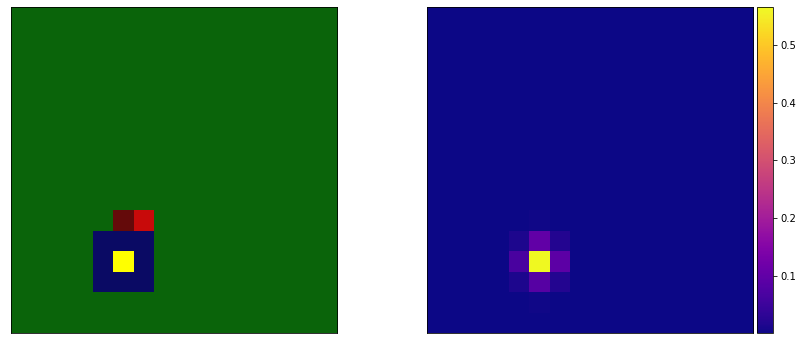

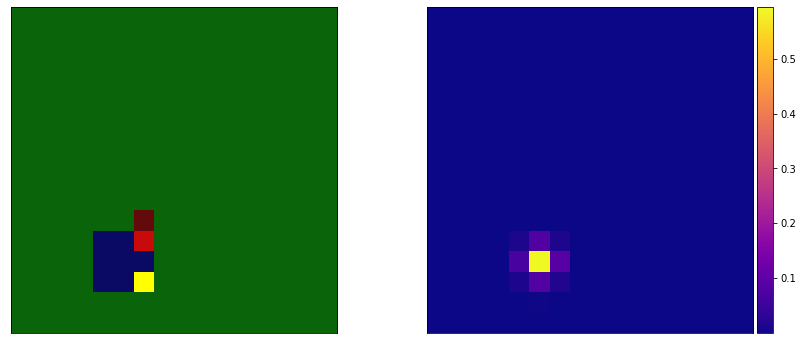

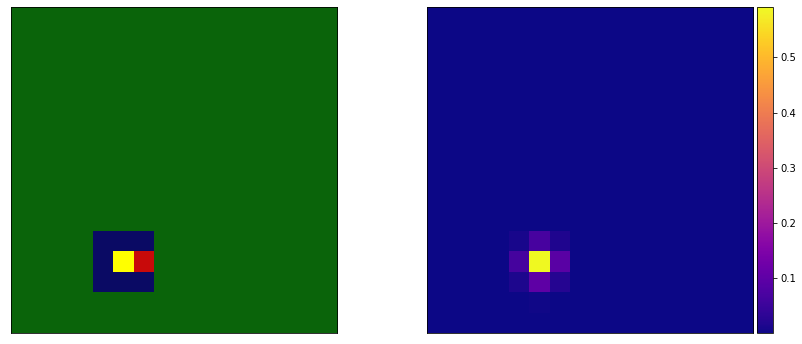

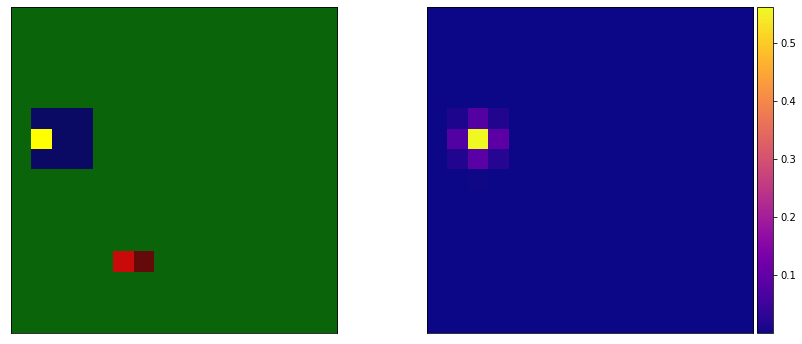

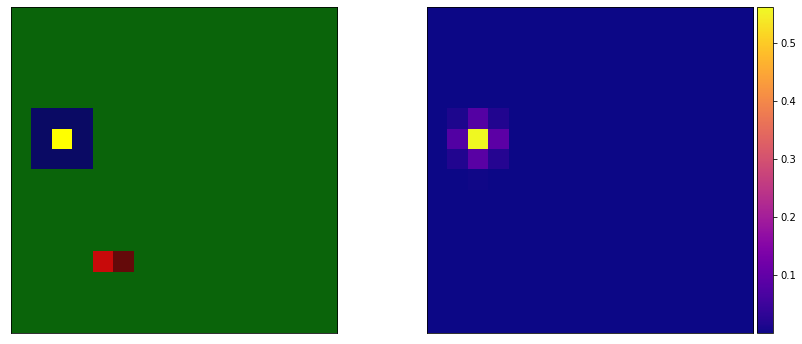

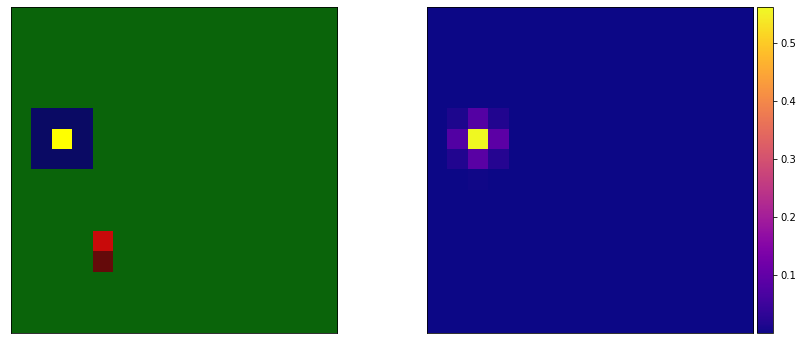

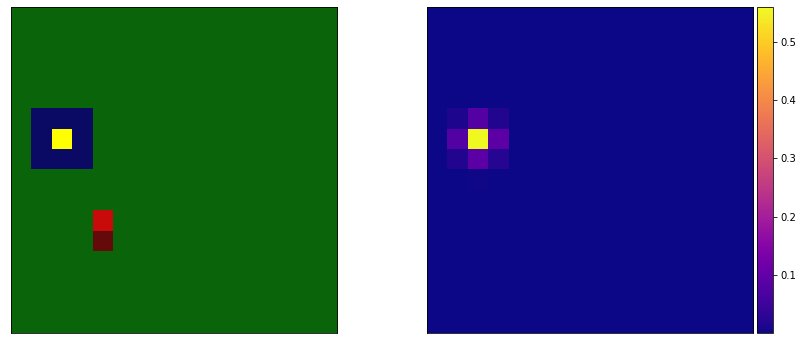

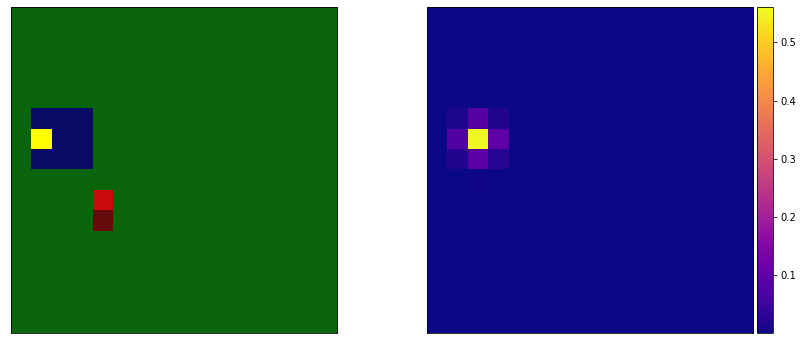

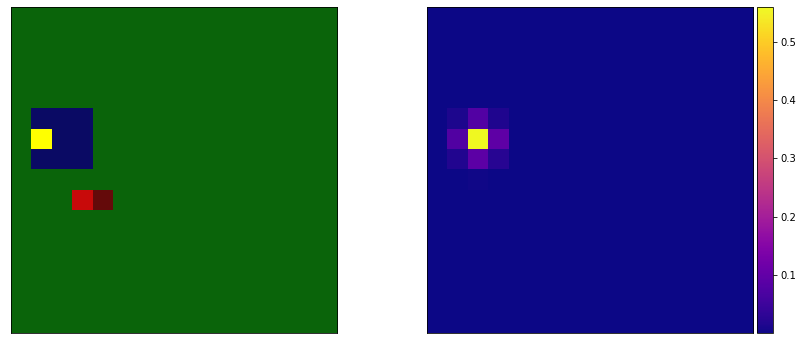

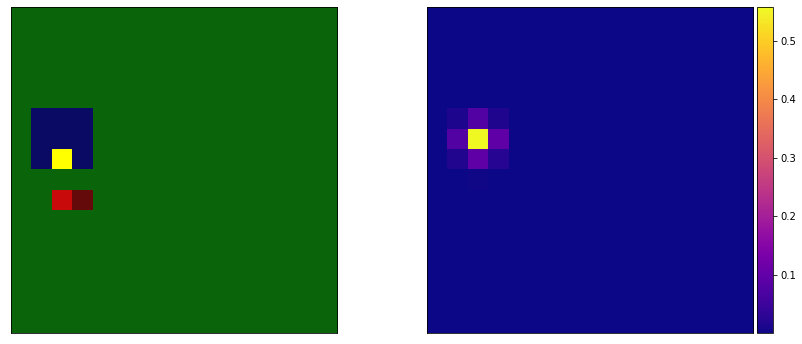

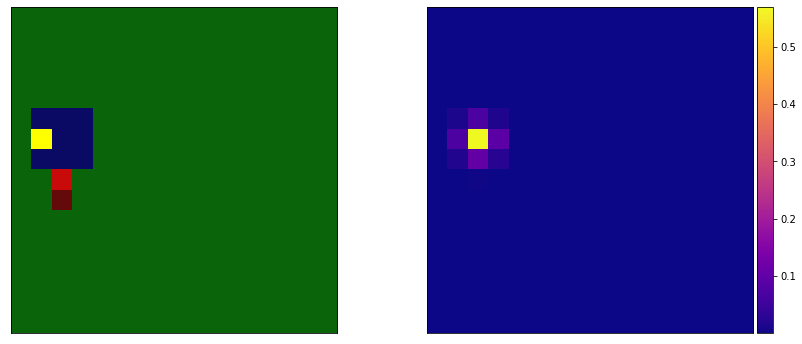

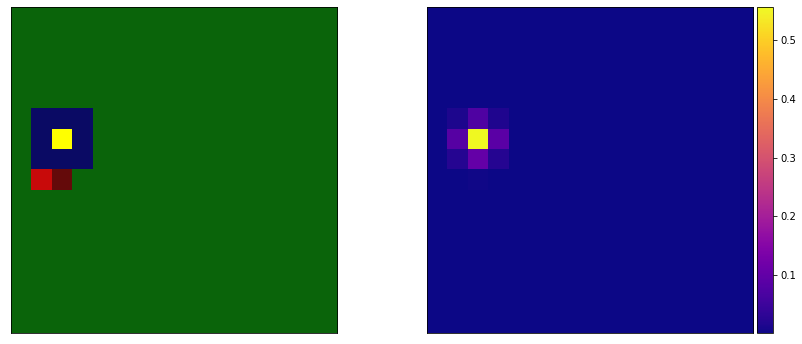

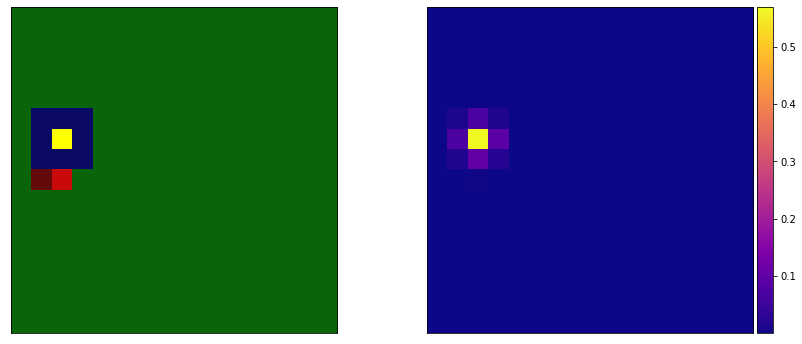

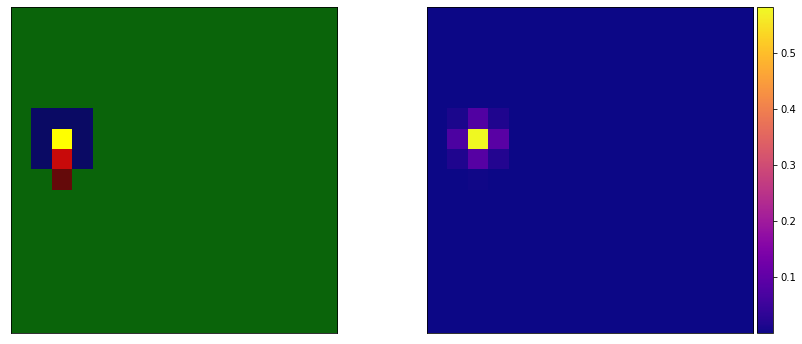

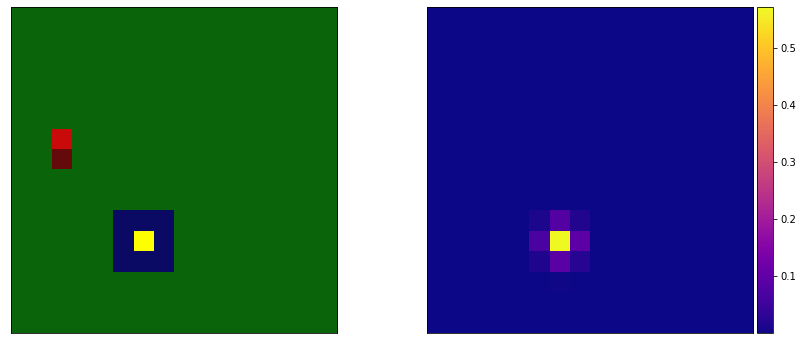

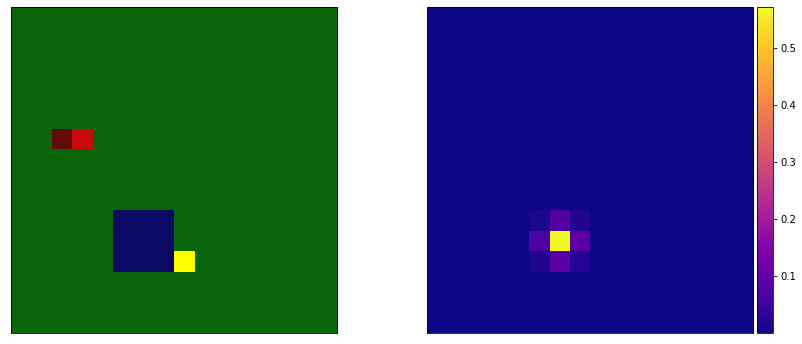

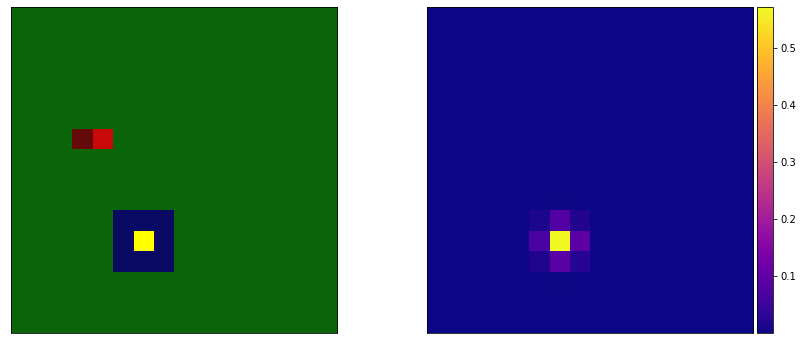

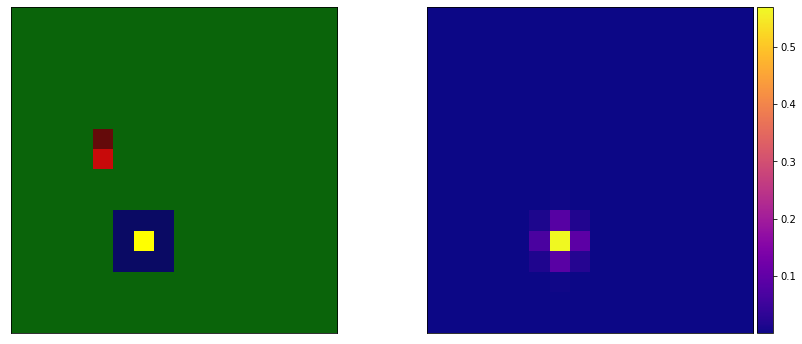

In [27]:
#for t in range(len(insp_dict['state_traj'])):
for t in range(50):
    plot_screen_and_decision(insp_dict, t)
    plt.show()

# Value and policy evolution with training

In [10]:
load = False
if load:
    agent = torch.load("Results/agent_"+PID, map_location='cpu')
    agent.device = 'cpu'
else: # For models not yet saved because they are still training
    RESOLUTION = 16
    game_params = dict(res=RESOLUTION)
    model_number = 0
    model_names = {0:"Critic-semi-conv"}

    if model_number == 0:
        print(model_names[model_number]+" selected.")
        actor_model = net.SpatialNet
        critic_model = net.CriticNet
        actor_dict = {"in_channels":2, 'linear_size':RESOLUTION}
        critic_dict = {"in_channels":2, 'linear_size':RESOLUTION}
    else:
        print("Model number not available. Choose 0.")

    HPs = dict(gamma=0.99, n_steps=5, H=1e-3, 
           actor_model=actor_model, critic_model=critic_model,
           actor_dict=actor_dict, critic_dict=critic_dict)

    # Load on cpu 
    HPs['device'] = 'cpu'

    lr = 1e-4
    agent = SpatialA2C(**HPs)

Critic-semi-conv selected.


# Loading training results

In [6]:
load_dir = "Results/"
queries = ['Critic-semi-conv']
train_dict = utils.load_session(load_dir, queries)

Number of matching filenames: 3
 ['S_Critic-semi-conv_lr-1e-4_5-steps_1.2M-env-steps_240-unroll-len_AVPT.npy', 'S_Critic-semi-conv_lr-1e-4_5-steps_1.2M-env-steps_240-unroll-len_pt2_AVPT.npy', 'S_Critic-semi-conv_lr-1e-4_5-steps_1.2M-env-steps_240-unroll-len_working!_FYMW.npy']


In [10]:
game_params = train_dict['game_params']
HPs = train_dict['HPs']
score = train_dict['score']
losses = train_dict['losses']
keywords = train_dict['keywords']
ID = keywords[-1]
print("HPs: ", HPs)

HPs:  {'gamma': 0.99, 'n_steps': 5, 'H': 0.001, 'actor_model': <class 'AC_modules.Networks.SpatialNet'>, 'critic_model': <class 'AC_modules.Networks.CriticNet'>, 'actor_dict': {'in_channels': 2, 'linear_size': 16}, 'critic_dict': {'in_channels': 2, 'linear_size': 16}, 'device': 'cuda'}


In [11]:
from Utils import plot

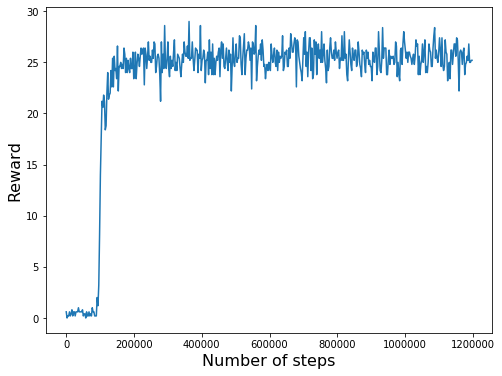

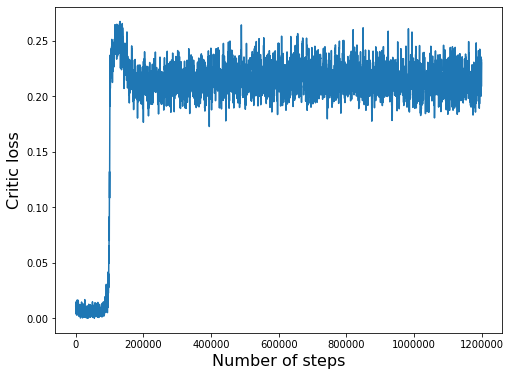

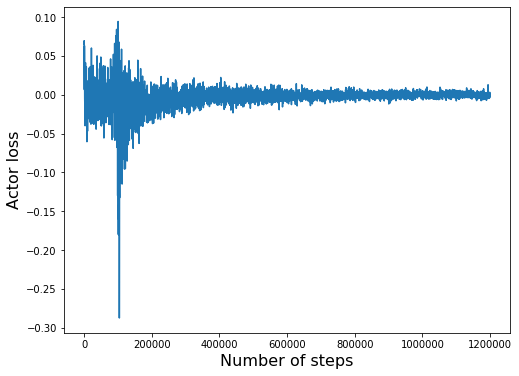

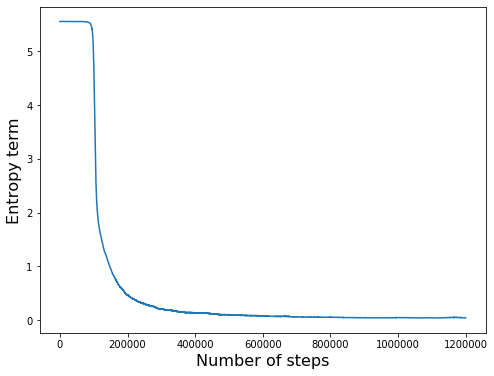

In [22]:
plot.plot_bA2C_session(score, losses, unroll_length=240, test_interval=10, moving_average=False, average_window=10)